<a href="https://colab.research.google.com/github/sdasmaha/Ml_Engineers_445/blob/master/ML_HW_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook Excercise #2
#Srinjoy DasMahapatra

IDE => Google Colab Pro

In [38]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex


In [215]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [216]:
df_iot_tel = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/BAJWA-ML/Notebook 2/iot_telemetry_dataset.csv")

# 1. Feature Engineering for _Environmental Sensor Telemetry Data_

## Problem 1.1

###(a)

From Videos ML

### (b)

In [ ]:
df_iot_tel.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
print(df_iot_tel.shape) 

(405184, 9)


There are **405,184** data samples in the dataset.

### (c)



In [ ]:
df_iot_tel['device'].dtypes

dtype('O')

We can see the MAC address is of datatype=> **O** (Object)

In [ ]:
df_iot_tel['device'].where(df_iot_tel['device'] == '00:0f:00:70:91:0a').value_counts()

00:0f:00:70:91:0a    111815
Name: device, dtype: int64

There are **111,815** data samples with the MAC address 00:0f:00:70:91:0a 

### (d)

In [ ]:
df_iot_tel['device'].where(df_iot_tel['device'] == '1c:bf:ce:15:ec:4d').value_counts()

1c:bf:ce:15:ec:4d    105918
Name: device, dtype: int64

There are **105,918** data samples with the MAC address 1c:bf:ce:15:ec:4d


### (e)

In [ ]:
df_iot_tel['device'].where(df_iot_tel['device'] == 'b8:27:eb:bf:9d:51').value_counts()

b8:27:eb:bf:9d:51    187451
Name: device, dtype: int64

There are **187,451** data samples with the MAC address b8:27:eb:bf:9d:51

**Adding all the MAC addresses individually we get 405184.  Hence there is only 3 MAC addresses in total**

## Problem 1.2

In [ ]:
df_iot_tel.dtypes

ts          float64
device       object
co          float64
humidity    float64
light          bool
lpg         float64
motion         bool
smoke       float64
temp        float64
dtype: object

 The problem mentions most of the challenges that otherwise needed to be worked on : 
 1.  No missing Entries
 2. pandas.get_dummies() can be used 


### (a)

**Device**

In [221]:
MAC_types = df_iot_tel['device']
dum_df = pd.get_dummies(MAC_types, prefix="MAC:" )
MAC_df = df_iot_tel.join(dum_df)
MAC_df = MAC_df.drop(columns = 'device')
MAC_df.head(5)

,ts,co,humidity,light,lpg,motion,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51
0,1.594512e+09,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,0,0,1
1,1.594512e+09,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,1,0,0
2,1.594512e+09,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,0,0,1
3,1.594512e+09,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,0,1,0
4,1.594512e+09,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,0,0,1


**Light**

In [222]:
light_types = MAC_df['light']
dum_df_light = pd.get_dummies(light_types, prefix="Light:" )
light_df = MAC_df.join(dum_df_light)
light_df = light_df.drop(columns = 'light')
light_df.head(5)

,ts,co,humidity,lpg,motion,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51,Light:_False,Light:_True
0,1.594512e+09,0.004956,51.000000,0.007651,False,0.020411,22.700000,0,0,1,1,0
1,1.594512e+09,0.002840,76.000000,0.005114,False,0.013275,19.700001,1,0,0,1,0
2,1.594512e+09,0.004976,50.900000,0.007673,False,0.020475,22.600000,0,0,1,1,0
3,1.594512e+09,0.004403,76.800003,0.007023,False,0.018628,27.000000,0,1,0,0,1
4,1.594512e+09,0.004967,50.900000,0.007664,False,0.020448,22.600000,0,0,1,1,0


**Motion**

In [226]:
motion_types = light_df['motion']
dum_df_motion = pd.get_dummies(motion_types, prefix="Motion:" )
motion_df = light_df.join(dum_df_motion)
motion_df = motion_df.drop(columns = 'motion')
one_hot_encoded_df = motion_df
one_hot_encoded_df.head(5)

,ts,co,humidity,lpg,smoke,temp,MAC:_00:0f:00:70:91:0a,MAC:_1c:bf:ce:15:ec:4d,MAC:_b8:27:eb:bf:9d:51,Light:_False,Light:_True,Motion:_False,Motion:_True
0,1.594512e+09,0.004956,51.000000,0.007651,0.020411,22.700000,0,0,1,1,0,1,0
1,1.594512e+09,0.002840,76.000000,0.005114,0.013275,19.700001,1,0,0,1,0,1,0
2,1.594512e+09,0.004976,50.900000,0.007673,0.020475,22.600000,0,0,1,1,0,1,0
3,1.594512e+09,0.004403,76.800003,0.007023,0.018628,27.000000,0,1,0,0,1,1,0
4,1.594512e+09,0.004967,50.900000,0.007664,0.020448,22.600000,0,0,1,1,0,1,0


### (b)

In [230]:
group_device1 = one_hot_encoded_df.groupby("MAC:_00:0f:00:70:91:0a")

In [234]:
group_device1 = group_device1.get_group(1)

In [235]:
group_device1.iloc[:,np.r_[1,2,3,4,5]] = group_device1.iloc[:,np.r_[1,2,3,4,5]] - group_device1.iloc[:,np.r_[1,2,3,4,5]].mean()
group_device1.iloc[:,np.r_[1,2,3,4,5]] = group_device1.iloc[:,np.r_[1,2,3,4,5]] /  group_device1.iloc[:,np.r_[1,2,3,4,5]].std()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
grouped = df_iot_tel.groupby(df_iot_tel.device)
device1 = grouped.get_group("00:0f:00:70:91:0a")
device2 = grouped.get_group("1c:bf:ce:15:ec:4d")
device3 = grouped.get_group("b8:27:eb:bf:9d:51")

In [ ]:
device1.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
7,1.594512e+09,00:0f:00:70:91:0a,0.002938,76.000000,False,0.005241,False,0.013628,19.700001
15,1.594512e+09,00:0f:00:70:91:0a,0.002905,75.800003,False,0.005199,False,0.013509,19.700001
20,1.594512e+09,00:0f:00:70:91:0a,0.002938,75.800003,False,0.005241,False,0.013628,19.700001
23,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001


In [ ]:
device1.iloc[:,np.r_[2,3,5,7,8]] = device1.iloc[:,np.r_[2,3,5,7,8]] - device1.iloc[:,np.r_[2,3,5,7,8]].mean()
device1.iloc[:,np.r_[2,3,5,7,8]] = device1.iloc[:,np.r_[2,3,5,7,8]] /  device1.iloc[:,np.r_[2,3,5,7,8]].std()
device2.iloc[:,np.r_[2,3,5,7,8]] = device2.iloc[:,np.r_[2,3,5,7,8]] - device2.iloc[:,np.r_[2,3,5,7,8]].mean()
device2.iloc[:,np.r_[2,3,5,7,8]] = device2.iloc[:,np.r_[2,3,5,7,8]]/  device2.iloc[:,np.r_[2,3,5,7,8]].std()
device3.iloc[:,np.r_[2,3,5,7,8]] = device3.iloc[:,np.r_[2,3,5,7,8]] - device3.iloc[:,np.r_[2,3,5,7,8]].mean()
device3.iloc[:,np.r_[2,3,5,7,8]] = device3.iloc[:,np.r_[2,3,5,7,8]]/  device3.iloc[:,np.r_[2,3,5,7,8]].std()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [ ]:
avg = device1.mean()
stdv = device1.std()
standardized_device1 = (device1 - avg) / stdv
standardized_device1.head(5)


,3,4,5,7,8,co,device,humidity,light,lpg,motion,smoke,temp,ts
1,NaN,NaN,NaN,NaN,NaN,-0.464451,NaN,0.281222,-0.182601,-0.458333,-0.00518,-0.460392,0.524162,-1.737234
7,NaN,NaN,NaN,NaN,NaN,-0.398156,NaN,0.281222,-0.182601,-0.383561,-0.00518,-0.387058,0.524162,-1.737173
15,NaN,NaN,NaN,NaN,NaN,-0.420542,NaN,0.179999,-0.182601,-0.408731,-0.00518,-0.411758,0.524162,-1.737093
20,NaN,NaN,NaN,NaN,NaN,-0.398156,NaN,0.179999,-0.182601,-0.383561,-0.00518,-0.387058,0.524162,-1.737050
23,NaN,NaN,NaN,NaN,NaN,-0.464451,NaN,0.281222,-0.182601,-0.458333,-0.00518,-0.460392,0.524162,-1.737031


In [ ]:
standardized_device1.mean()

3                    NaN
4                    NaN
5                    NaN
7                    NaN
8                    NaN
co         -9.287036e-13
device               NaN
humidity    1.240455e-14
light       2.039881e-14
lpg         1.560453e-16
motion     -3.222828e-15
smoke      -4.403732e-14
temp        7.877475e-16
ts         -8.911983e-11
dtype: float64

In [ ]:
standardized_device1.var()

3           NaN
4           NaN
5           NaN
7           NaN
8           NaN
co          1.0
device      NaN
humidity    1.0
light       1.0
lpg         1.0
motion      1.0
smoke       1.0
temp        1.0
ts          1.0
dtype: float64

In [ ]:
avg2 = device2.mean()
stdv2 = device2.std()
standardized_device2 = (device1 - avg2) / stdv2
standardized_device2.head(5)

,3,4,5,7,8,co,device,humidity,light,lpg,motion,smoke,temp,ts
1,NaN,NaN,NaN,NaN,NaN,-4.190906,NaN,-6.889934,-inf,-1246.789007,-0.056328,-453.288789,-12.584391,-1.734001
7,NaN,NaN,NaN,NaN,NaN,-3.884962,NaN,-6.889934,-inf,-1046.348375,-0.056328,-383.787456,-12.584391,-1.733940
15,NaN,NaN,NaN,NaN,NaN,-3.988270,NaN,-6.901250,-inf,-1113.821466,-0.056328,-407.196231,-12.584391,-1.733860
20,NaN,NaN,NaN,NaN,NaN,-3.884962,NaN,-6.901250,-inf,-1046.348375,-0.056328,-383.787456,-12.584391,-1.733817
23,NaN,NaN,NaN,NaN,NaN,-4.190906,NaN,-6.889934,-inf,-1246.789007,-0.056328,-453.288789,-12.584391,-1.733798


In [ ]:
avg3 = device3.mean()
stdv3 = device3.std()
standardized_device3 = (device3 - avg3) / stdv3
standardized_device3.head(5)

,co,device,humidity,light,lpg,motion,smoke,temp,ts
0,-1.080793,NaN,0.098428,-0.127554,-1.093491,-0.027727,-1.091260,0.871610,-1.732015
2,-1.044864,NaN,0.045488,-0.127554,-1.056107,-0.027727,-1.054137,0.664099,-1.731996
4,-1.060344,NaN,0.045488,-0.127554,-1.072209,-0.027727,-1.070127,0.664099,-1.731978
6,-1.044841,NaN,0.045488,-0.127554,-1.056083,-0.027727,-1.054113,0.664099,-1.731959
9,-1.055167,NaN,0.045488,-0.127554,-1.066824,-0.027727,-1.064779,0.664099,-1.731941


### (c)

In [ ]:
df_final = standardized_device1.agg(standardized_device2)

AttributeError: ignored

### (d)

ts variable in the dataset has not been touched during pre processing because it represents the the time series data and timestamps 

_Your answer for 1.2d goes here_

### (e)

In [ ]:
device1 = one_hot_encoded_df['MAC:_00:0f:00:70:91:0a'] == 1
device2 = one_hot_encoded_df['MAC:_1c:bf:ce:15:ec:4d'] == 1
device3 = one_hot_encoded_df['MAC:_b8:27:eb:bf:9d:51'] == 1

In [ ]:
mean_co = [one_hot_encoded_df.loc[device1,'co'].mean(),one_hot_encoded_df.loc[device2,'co'].mean(),one_hot_encoded_df.loc[device2,'co'].mean()]
mean_humidity = [one_hot_encoded_df.loc[device1,'humidity'].mean(),one_hot_encoded_df.loc[device2,'humidity'].mean(),one_hot_encoded_df.loc[device3,'humidity'].mean()]
mean_lpg = [one_hot_encoded_df.loc[device1,'lpg'].mean(),one_hot_encoded_df.loc[device2,'lpg'].mean(),one_hot_encoded_df.loc[device3,'lpg'].mean()]
mean_smoke = [one_hot_encoded_df.loc[device1,'smoke'].mean(),one_hot_encoded_df.loc[device2,'smoke'].mean(),one_hot_encoded_df.loc[device3,'smoke'].mean()]
mean_temp = [one_hot_encoded_df.loc[device1,'temp'].mean(),one_hot_encoded_df.loc[device2,'temp'].mean(),one_hot_encoded_df.loc[device3,'temp'].mean()]

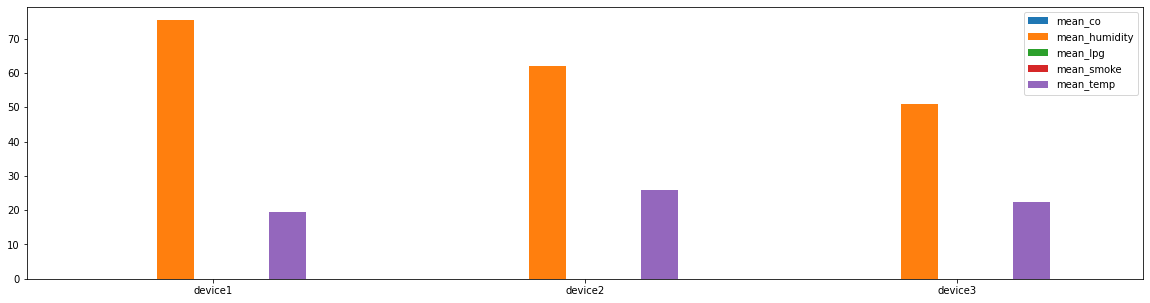

In [ ]:
index = ['device1','device2','device3']
df = pd.DataFrame({'mean_co': mean_co,'mean_humidity': mean_humidity, 'mean_lpg': mean_lpg, 'mean_smoke': mean_smoke, 'mean_temp':mean_temp}, index = index)
ax = df.plot.bar(rot=0,figsize=(20,5))


In [ ]:
var_co = [one_hot_encoded_df.loc[device1,'co'].var(),one_hot_encoded_df.loc[device2,'co'].var(),one_hot_encoded_df.loc[device2,'co'].var()]
var_humidity = [one_hot_encoded_df.loc[device1,'humidity'].var(),one_hot_encoded_df.loc[device2,'humidity'].var(),one_hot_encoded_df.loc[device3,'humidity'].var()]
var_lpg = [one_hot_encoded_df.loc[device1,'lpg'].var(),one_hot_encoded_df.loc[device2,'lpg'].var(),one_hot_encoded_df.loc[device3,'lpg'].var()]
var_smoke = [one_hot_encoded_df.loc[device1,'smoke'].var(),one_hot_encoded_df.loc[device2,'smoke'].var(),one_hot_encoded_df.loc[device3,'smoke'].var()]
var_temp = [one_hot_encoded_df.loc[device1,'temp'].var(),one_hot_encoded_df.loc[device2,'temp'].var(),one_hot_encoded_df.loc[device3,'temp'].var()]

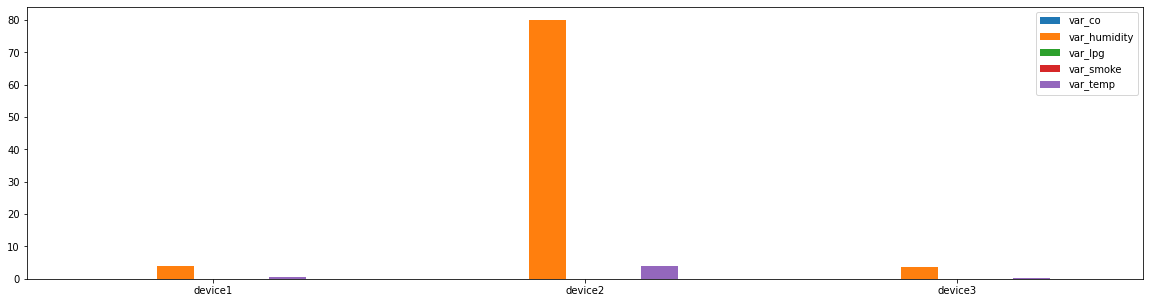

In [ ]:
index2 = ['device1','device2','device3']
df2 = pd.DataFrame({'var_co': var_co,'var_humidity': var_humidity, 'var_lpg': var_lpg, 'var_smoke': var_smoke, 'var_temp':var_temp}, index = index)
ax2 = df2.plot.bar(rot=0,figsize=(20,5))

In [ ]:
**Variance of the five independent variables**

## Problem 1.3

In [ ]:
# Code of 1.3 goes here

# 2. Feature Learning for _Synthetically Generated Data_

## Problem 2.1

### (a)

In [164]:
A = np.random.randn(3,2)
print(A)

[[-0.36115307 -1.58028836]
 [-1.72278315 -0.1004024 ]
 [-0.35939701  0.74454762]]


### (b)

In [165]:
np.linalg.matrix_rank(A, tol=None)

2

### (c)

In [166]:
print(np.linalg.norm(A[0]))

1.6210314153331395


In [167]:
print(np.linalg.norm(A[1]));

1.7257063503346064


In [168]:
print(np.linalg.norm(A[2]))

0.8267510891666868


In [169]:
a = A[0]; print(a)
b = A[1]; print(b)
c = A[2]; print(c)

[-0.36115307 -1.58028836]
[-1.72278315 -0.1004024 ]
[-0.35939701  0.74454762]


In [170]:
print(np.inner(a,b));
print(np.inner(a,c));
print(np.inner(b,c));

0.7808531588901428
-1.0468025983152864
0.5444087495540886


### (d)

Show if this belongs to the subspace corresponding to the column space of A


In [171]:
x1 = np.random.random(2);
x2 = np.random.random(2);
x3 = np.random.random(2);
print(x1);
print(x2);
print(x3);

[0.27772595 0.36043822]
[0.29140755 0.64457465]
[0.59659237 0.50852893]



 We see that the vectors x1, x2 and x3 are closed under addition and 
scalar multiplication hence they belong to the same subspace S.

## Problem 2.2

###(a)

In [172]:
b = np.random.randn(2,250)

In [173]:
x = A@b

We can clearly see the data samples when printed are in not a data matrix format when we decide to print a data sample. Hence we save it in data matrix **R** nxp format.

###(b)

Yes, kinda, watch ML videos

###(c)

In [174]:
 X = np.transpose(x)

In [175]:
print(X)

[[ 9.19893786e-01 -9.56368153e-01 -7.49551166e-01]
 [-2.01834489e+00 -9.93557515e-02  9.59932973e-01]
 [ 1.29816461e+00  2.35990071e+00  9.78631818e-02]
 [-1.48055607e+00 -2.27760637e+00  1.73172904e-02]
 [-2.42362765e+00 -2.12058437e+00  5.29225785e-01]
 [-4.43204227e+00 -1.42370418e+00  1.73233624e+00]
 [ 3.53902870e-01  2.82563816e-02 -1.64942177e-01]
 [-1.01357520e+00  3.04378729e+00  1.44584006e+00]
 [ 2.26687936e+00  2.20884801e-01 -1.04408825e+00]
 [-2.82384409e+00 -1.11870556e+00  1.03782477e+00]
 [-1.24723232e+00 -3.49608322e+00 -4.76824594e-01]
 [-2.83554665e+00 -3.13845004e+00  4.14355837e-01]
 [ 8.09317364e-01  8.05762474e-01 -1.46305485e-01]
 [ 4.96109626e-01  1.36533090e+00  1.81783830e-01]
 [-2.51936560e-01 -2.36210050e+00 -6.12183265e-01]
 [-4.25939263e-01  2.95237440e-01  3.01086236e-01]
 [ 1.51445984e+00  1.18870852e+00 -3.73188063e-01]
 [ 1.30715951e+00 -2.89391102e-01 -7.31890831e-01]
 [ 8.36923518e-01 -1.93511715e+00 -1.01372900e+00]
 [-2.31844768e+00 -1.82948295e+

In [176]:
print(X.shape);

(250, 3)


n = 250
p = 3

###(d)

In [177]:
np.linalg.matrix_rank(X, tol=None)

2

## Problem 2.3

###(a)

In [178]:
SVD = np.linalg.svd(X)

x = pd.DataFrame(list(SVD)) 
print(x)

u{ (…, M, M), (…, M, K) } array
Unitary array(s). The first a.ndim - 2 dimensions have the same size as those of the input a. The size of the last two dimensions depends on the value of full_matrices. Only returned when compute_uv is True.

s(…, K) array
Vector(s) with the singular values, within each vector sorted in descending order. The first a.ndim - 2 dimensions have the same size as those of the input a.

vh{ (…, N, N), (…, K, N) } array
Unitary array(s). The first a.ndim - 2 dimensions have the same size as those of the input a. The size of the last two dimensions depends on the value of full_matrices. Only returned when compute_uv is True.

In [179]:
x = pd.DataFrame(list(SVD)) 
print(x)

                                                   0
0  [[-0.0043383580607568315, -0.05741893612307721...
1  [32.86750577383878, 26.425884298576605, 3.4902...
2  [[-0.7284571577695266, -0.6686178727043696, 0....


Left Singular Vectors



In [180]:
print(x.iloc[0,0])

[[-0.00433836 -0.05741894  0.0388427  ... -0.03605061 -0.02878957
  -0.08241678]
 [ 0.05111609  0.05590413  0.92516199 ... -0.03150531  0.00917782
  -0.05661153]
 [-0.0763342   0.03725602 -0.01843201 ... -0.11406585 -0.1657787
  -0.11819444]
 ...
 [-0.10382161  0.09356643  0.01485197 ...  0.9828962  -0.01690515
  -0.02273543]
 [-0.10607622  0.10339744 -0.03164086 ... -0.02287891  0.97489763
  -0.02863581]
 [-0.15649807  0.09285445  0.04240124 ... -0.0196448  -0.0179784
   0.97188462]]


singular values = Diagonal Matrix

In [181]:
print(x.iloc[1,0])

[3.28675058e+01 2.64258843e+01 3.49024220e-15]


Right Singular Vectors = Orthogonal


In [182]:
print(x.iloc[2,0])

[[-0.72845716 -0.66861787  0.14933288]
 [-0.53779577  0.69312269  0.47995484]
 [-0.42441239  0.26931595 -0.86449005]]


In [183]:
np.isin(3.37057164e+02,array1)

array(False)

In [184]:
X_T = np.transpose(X)
print(X_T[0,:3])
print(X_T[:3,0])

[ 0.91989379 -2.01834489  1.29816461]
[ 0.91989379 -0.95636815 -0.74955117]


In [185]:
XT_X = X_T@X
print(XT_X.shape);

(3, 3)


Matrix XT_X itself


In [186]:
print(XT_X)

[[ 775.21988462  265.84974569 -297.76554677]
 [ 265.84974569  818.42563861  124.44926461]
 [-297.76554677  124.44926461  184.95477353]]


In [187]:
np.linalg.eigvals(XT_X)

array([2.27373675e-13, 1.08027294e+03, 6.98327361e+02])

In [188]:
array_singular_vals = [5.68434189e-14, 3.37057164e+02, 1.68114163e+02]
np.square(array_singular_vals)

array([3.23117427e-27, 1.13607532e+05, 2.82623718e+04])



---



---


###(i)

We can clearly see that the right singular vectors of X correspond to the eigenvectors of(X^T_X).

In [189]:
np.linalg.eig(XT_X)

(array([2.27373675e-13, 1.08027294e+03, 6.98327361e+02]),
 array([[ 0.42441239, -0.72845716, -0.53779577],
        [-0.26931595, -0.66861787,  0.69312269],
        [ 0.86449005,  0.14933288,  0.47995484]]))

In [139]:
print(x.iloc[2,0])

[[ 0.40168151  0.67785668 -0.61576156]
 [-0.16426244 -0.60815519 -0.77663705]
 [-0.9009272   0.41310724 -0.1329383 ]]




---



###(ii)

Eigen Values of XT_X

In [190]:
np.linalg.eigvals(XT_X)

array([2.27373675e-13, 1.08027294e+03, 6.98327361e+02])

Singular Values of X

In [194]:
print(x.iloc[1,0])

[3.28675058e+01 2.64258843e+01 3.49024220e-15]


In [199]:
array_singular_vals = [x.iloc[1,0]]
array_singular_vals = np.square(array_singular_vals)

We can cleary see that the eigenvales of X^T_X are square of the singular values of X

###(iii)

Energy of XF


In [212]:
np.asarray(array_singular_vals)
print(array_singular_vals)

[[1.08027294e+03 6.98327361e+02 1.21817906e-29]]


In [213]:
np.sum(array_singular_vals)

1778.600296755083

###(b)

###(i)

###(ii)

## Problem 2.4


###(a)

###(b)